## Configuración de la sección

En esta sección se realiza lo siguiente:
- Importado de las librerías necesarias para trabajar en todo el *notebook*.
- Exploración de los datos.
- Separación de los datos en entrenamiento y pruebas.
- Selección de las variables X y Y para el entrenamiento del modelo.

In [ ]:
# Imports
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the CSV files with pandas

df_train = pd.read_csv("../data/processed/original/train50.csv")
df_test = pd.read_csv("../data/processed/original/test50.csv")

In [3]:
# Exploring the data

df_train.head()

,Shared_Markers,k0,k1,k2,Share_allele,Value,True_positive,Marcadores,Software,Datos,Kinship,File,Hoja,Sheet,Value_range,FAM_Sample_info_id,FAM_Sample_info_rel,VIC_Sample_info_id,VIC_Sample_info_rel
0,15,0,4,11,26,236354.0,False,15,BlindSeach,Simulados,Paternidad,15_BlindSeach_Simulados_Paternidad_allele,ipi-1,1:749,100000-999999,12102,F,65402,F
1,15,0,7,8,23,184374.0,False,15,BlindSeach,Simulados,Paternidad,15_BlindSeach_Simulados_Paternidad_allele,ipi-1,1:749,100000-999999,23802,S,99602,F
2,15,0,6,9,24,83900.6,False,15,BlindSeach,Simulados,Paternidad,15_BlindSeach_Simulados_Paternidad_allele,ipi-1,1:749,10000-99999,47302,S,62402,F
3,15,0,10,5,20,41143.0,False,15,BlindSeach,Simulados,Paternidad,15_BlindSeach_Simulados_Paternidad_allele,ipi-1,1:749,10000-99999,116102,F,116702,F
4,15,0,8,7,22,30327.8,False,15,BlindSeach,Simulados,Paternidad,15_BlindSeach_Simulados_Paternidad_allele,ipi-1,1:749,10000-99999,122502,F,83702,S


In [4]:
# Feature columns for the logistic regression model

feature_colums = ["Shared_Markers", "k0", "k1", "k2", "Share_allele", "Value"]

In [5]:
# Splitting data into training and testing sets

x_train = df_train[feature_colums]
y_train = df_train["True_positive"]
x_test = df_test[feature_colums]
y_test = df_test["True_positive"]

In [6]:
# Base Logistic Regression model 

svm_model = SVC()

---

## Máquina de soporte vectorial base con múltiples variables

Modelo de SVM entrenado con hiperparámetros por defecto e impresión de la matriz de confusión.

In [ ]:
# Training and evaluation of the SVM model

svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred)

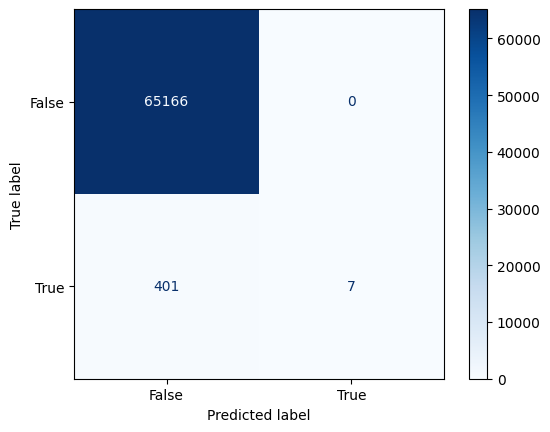

In [8]:
# Print the confusion matrix

cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=svm_model.classes_)
cm_display.plot(cmap=plt.cm.Blues)

In [9]:
print("===== Metrics for Logistic Regression Model =====")
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))

===== Metrics for Logistic Regression Model =====
Precision: 1.0
Recall: 0.01715686274509804
F1 Score: 0.033734939759036145
Accuracy: 0.9938847714033001
ROC AUC: 0.508578431372549


---

In [10]:
# Feature columns for the logistic regression model

feature_colums = ["k1", "k2","Value"]

In [11]:
# Splitting data into training and testing sets

x_train = df_train[feature_colums]
y_train = df_train["True_positive"]
x_test = df_test[feature_colums]
y_test = df_test["True_positive"]

In [12]:
# Base Logistic Regression model 

svm_model = SVC()

In [13]:
# Training and evaluation of the logistic regression model

svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred)

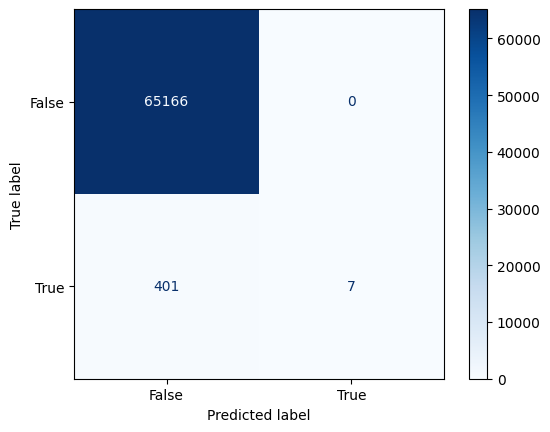

In [14]:
# Print the confusion matrix

cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=svm_model.classes_)
cm_display.plot(cmap=plt.cm.Blues)

In [15]:
print("===== Metrics for Logistic Regression Model =====")
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))

===== Metrics for Logistic Regression Model =====
Precision: 1.0
Recall: 0.01715686274509804
F1 Score: 0.033734939759036145
Accuracy: 0.9938847714033001
ROC AUC: 0.508578431372549
